Importing relevant libraries

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Loading and preparing the data // sample

In [5]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())
      
# Load your dataset
data_frame = pd.read_csv(os.path.join(path_now,"Combined","train", "LAYING", "Subject_1.csv"), delimiter= ',')

accx_data = []
accy_data = []
accz_data = []

print(data_frame)

accx_data.append(data_frame['accx'].values)
accy_data.append(data_frame['accy'].values)
accz_data.append(data_frame['accz'].values)

np_accx = np.array(accx_data)
np_accy = np.array(accy_data)
np_accz = np.array(accz_data)

# Assume the columns 'accel_X', 'accel_Y', 'accel_Z' represent the raw accelerometer data
# X = data[['accx', 'accy', 'accz']]  # Features (adjust column names as necessary)
# y = data['LAYING']  # Target variable


          accx      accy      accz
0     0.181141  0.787813  0.581194
1     0.180389  0.788230  0.584017
2     0.184572  0.788880  0.580620
3     0.187104  0.788494  0.574279
4     0.186461  0.786544  0.570184
...        ...       ...       ...
3195  0.117154  0.937592 -0.346806
3196  0.119710  0.937131 -0.346094
3197  0.109197  0.937901 -0.344062
3198  0.100659  0.937448 -0.344856
3199  0.104422  0.938384 -0.345324

[3200 rows x 3 columns]


In [6]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs = []
# Load your dataset
action_types = ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
csv_directory = []
for action in action_types:
    csv_directory = csv_directory + [os.path.join(path_now,"Combined","train", action)]

# print(csv_directory[0])
action_freq = [0,0,0,0,0,0]

for i in range(6):
    sum_freq = 0
    for filename in os.listdir(csv_directory[i]):
        filepath = os.path.join(csv_directory[i], filename)
        print(filepath)
        # Read the CSV file
        df = pd.read_csv(filepath, delimiter=',')
        # print(df)
        # Append the DataFrame to the list
        dfs.append(df)

        # Optionally, print the filename to confirm processing
        print(f"Processed: {filename}")
        print(len(df))
        sum_freq = sum_freq + len(df)

    # print(dfs.shape[0])
    action_freq[i] =  sum_freq



c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_1.csv
Processed: Subject_1.csv
3200
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_11.csv
Processed: Subject_11.csv
3648
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_14.csv
Processed: Subject_14.csv
3264
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_15.csv
Processed: Subject_15.csv
4608
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_16.csv
Processed: Subject_16.csv
4480
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\train\LAYING\Subject_17.csv
Processed: Subject_17.csv
4544
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\trai

In [7]:
print(action_freq)

# Combine all DataFrames into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Check the result
print(combined_df.shape)  # Print the shape of the combined DataFrame
print(combined_df)  # Print the first few rows of the combined DataFrame


[90048, 87936, 82304, 78464, 68672, 63104]
(470528, 3)
            accx      accy      accz
0       0.181141  0.787813  0.581194
1       0.180389  0.788230  0.584017
2       0.184572  0.788880  0.580620
3       0.187104  0.788494  0.574279
4       0.186461  0.786544  0.570184
...          ...       ...       ...
470523  0.590225  0.001552 -0.096826
470524  0.518104 -0.181908 -0.148720
470525  0.514909 -0.311256 -0.150640
470526  0.568525 -0.315488 -0.172318
470527  0.690852 -0.275761 -0.250478

[470528 rows x 3 columns]


y train

In [8]:
y_label = []
for i in range(6):
    y_label = y_label + [action_types[i]] * action_freq[i]

# Create the DataFrame
df_y_label = pd.DataFrame({'y_train': y_label})

print(df_y_label)

                   y_train
0                   LAYING
1                   LAYING
2                   LAYING
3                   LAYING
4                   LAYING
...                    ...
470523  WALKING_DOWNSTAIRS
470524  WALKING_DOWNSTAIRS
470525  WALKING_DOWNSTAIRS
470526  WALKING_DOWNSTAIRS
470527  WALKING_DOWNSTAIRS

[470528 rows x 1 columns]


Train now !!! Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

n = 8

# Without setting random_state
clf1 = DecisionTreeClassifier(max_depth= n, random_state= 43)
clf1.fit(combined_df, df_y_label)

# clf2 = DecisionTreeClassifier()
# clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=43)

Now, Test and Predict , but wait, we are using the Train Set

Accuracy: 0.7343
Precision: 0.7296
Recall: 0.7343

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00     90048
           SITTING       0.83      0.91      0.87     82304
          STANDING       0.78      0.87      0.82     87936
           WALKING       0.53      0.42      0.47     78464
WALKING_DOWNSTAIRS       0.64      0.45      0.52     63104
  WALKING_UPSTAIRS       0.50      0.63      0.56     68672

          accuracy                           0.73    470528
         macro avg       0.71      0.71      0.71    470528
      weighted avg       0.73      0.73      0.73    470528



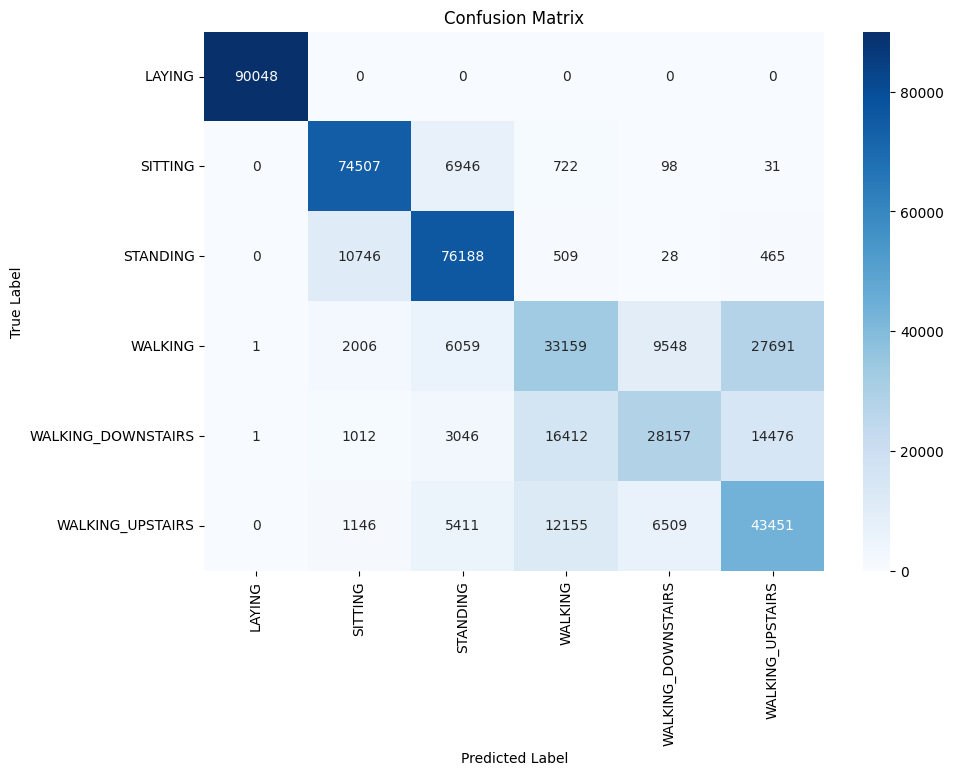

In [50]:
# Predict the test set
y_pred = clf1.predict(combined_df)

# Calculate accuracy
accuracy = accuracy_score(df_y_label, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label, y_pred, average='weighted')
recall = recall_score(df_y_label, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Making of Test Samples

In [42]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs_test = []
# Load your dataset
action_types = ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
csv_directory = []
for action in action_types:
    csv_directory = csv_directory + [os.path.join(path_now,"Combined","test", action)]

# print(csv_directory[0])
action_freq_test = [0,0,0,0,0,0]

for i in range(6):
    sum_freq = 0
    for filename in os.listdir(csv_directory[i]):
        filepath = os.path.join(csv_directory[i], filename)
        print(filepath)
        # Read the CSV file
        df = pd.read_csv(filepath, delimiter=',')
        # print(df)
        # Append the DataFrame to the list
        dfs_test.append(df)

        # Optionally, print the filename to confirm processing
        print(f"Processed test: {filename}")
        print(len(df))
        sum_freq = sum_freq + len(df)

    action_freq_test[i] =  sum_freq



c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_10.csv
Processed test: Subject_10.csv
3712
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_12.csv
Processed test: Subject_12.csv
3840
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_13.csv
Processed test: Subject_13.csv
3968
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_18.csv
Processed test: Subject_18.csv
4160
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_2.csv
Processed test: Subject_2.csv
3072
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset\Combined\test\LAYING\Subject_20.csv
Processed test: Subject_20.csv
4352
c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_H

In [43]:
print(action_freq_test)
print(sum(action_freq_test))
# Combine all DataFrames into one DataFrame
combined_df_test = pd.concat(dfs_test, ignore_index=True)

# Check the result
print(combined_df_test.shape)  # Print the shape of the combined DataFrame
print(combined_df_test)  # Print the first few rows of the combined DataFrame


[34368, 34048, 31424, 31744, 30144, 26880]
188608
(188608, 3)
            accx      accy      accz
0       0.088848  0.944508  0.306267
1       0.089700  0.981510  0.289673
2       0.089773  0.983380  0.291745
3       0.073487  0.971434  0.287301
4       0.049321  0.952625  0.278895
...          ...       ...       ...
188603  1.804806 -0.056638 -0.388152
188604  1.605566 -0.193700 -0.124331
188605  1.282075 -0.072075 -0.143086
188606  1.081836  0.014333 -0.266055
188607  1.002305  0.003153 -0.273409

[188608 rows x 3 columns]


In [44]:
y_label_test = []
for i in range(6):
    y_label_test = y_label_test + [action_types[i]] * action_freq_test[i]

# Create the DataFrame
df_y_label_test = pd.DataFrame({'y_train': y_label_test})

print(df_y_label_test)

                   y_train
0                   LAYING
1                   LAYING
2                   LAYING
3                   LAYING
4                   LAYING
...                    ...
188603  WALKING_DOWNSTAIRS
188604  WALKING_DOWNSTAIRS
188605  WALKING_DOWNSTAIRS
188606  WALKING_DOWNSTAIRS
188607  WALKING_DOWNSTAIRS

[188608 rows x 1 columns]


Now, Test and Predict , Using TEST SET 

combined_df_test --> x labels
df_y_label_test --> y label

depth: 8
Accuracy: 0.6358
Precision: 0.6389
Recall: 0.6358

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98     34368
           SITTING       0.74      0.77      0.76     31424
          STANDING       0.65      0.68      0.66     34048
           WALKING       0.43      0.39      0.41     31744
WALKING_DOWNSTAIRS       0.52      0.37      0.44     26880
  WALKING_UPSTAIRS       0.43      0.56      0.49     30144

          accuracy                           0.64    188608
         macro avg       0.63      0.62      0.62    188608
      weighted avg       0.64      0.64      0.63    188608



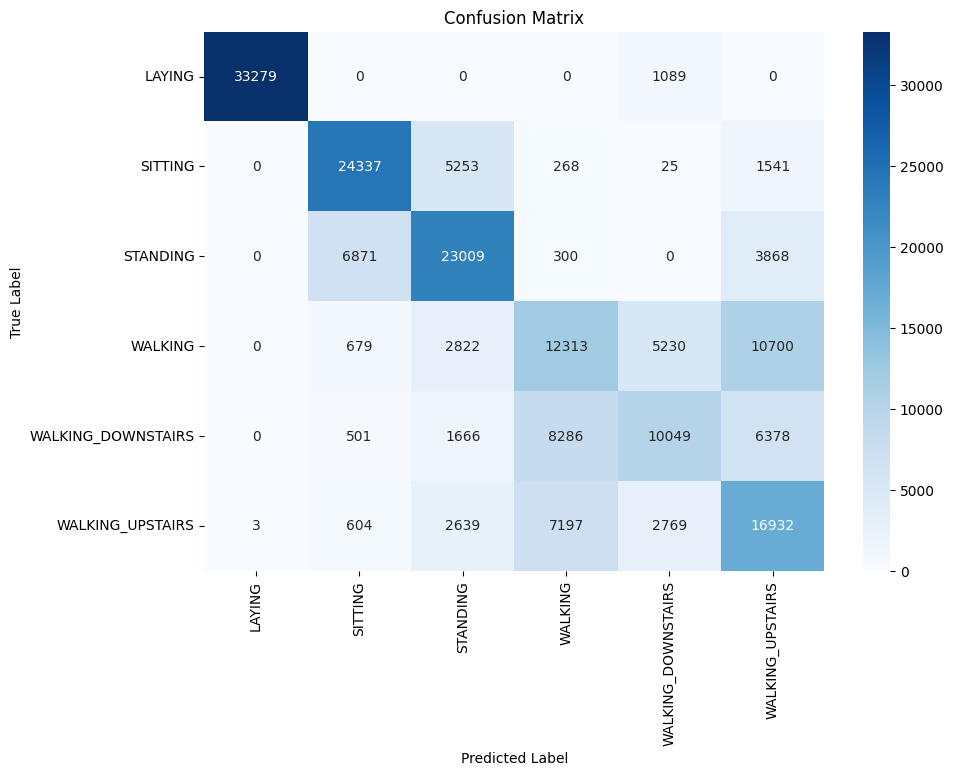

In [51]:
# Predict the test set
y_pred = clf1.predict(combined_df_test)

# Calculate accuracy
accuracy = accuracy_score(df_y_label_test, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label_test, y_pred, average='weighted')
recall = recall_score(df_y_label_test, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label_test, y_pred)

# Display the metrics
print(f"depth: {n}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


depth vs accuracy, precision and recall

depth: 2   
Accuracy: 0.4613     
Precision: 0.3088   
Recall: 0.4613   

depth: 3   
Accuracy: 0.5332   
Precision: 0.4548   
Recall: 0.5332   

depth: 4   
Accuracy: 0.6030   
Precision: 0.5938    
Recall: 0.6030   

depth: 5   
Accuracy: 0.6323   
Precision: 0.6263   
Recall: 0.6323    

depth: 6    
Accuracy: 0.6270    
Precision: 0.6271    
Recall: 0.6270    

depth: 7   
Accuracy: 0.6321   
Precision: 0.6364    
Recall: 0.6321    

depth: 8    
Accuracy: 0.6358    
Precision: 0.6389    
Recall: 0.6358    


